In [5]:
# Step1: download genome sequence
import requests
from bs4 import BeautifulSoup

def download_sequence(genename,link):
    """Return the genome sequence information of target gene from website."""
    #The following library downloads the data and stores it in a page variable
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')
    #getting the raw target genome sequence and stores it in a rawseq variable
    rawseq = soup.find_all('p', style="font-family: monospace")
    rawseq2 = rawseq[0].get_text().replace("\xa0","").replace("\n","").replace(" ","")
    seq = ''.join([i for i in rawseq2 if not i.isdigit()])
    print("Length is:",len(seq),"pb")
    print(genename, "genome sequence is:\n", seq)
    return len(seq)

In [8]:
download_sequence('ADF4','https://www.arabidopsis.org/servlets/TairObject?type=sequence&id=2002976339')

Length is: 1565 pb
ADF4 genome sequence is:
 GAAATTACGAAGAAAATAAATAAAAATACAAAAAGCAGGTTCTTCTCTATATATTCGGAATTTAGCTTCCAAATAACGCAGAAGAAAGTAAAGAGAGAAGAAGCAAAAAGAGTCATATTCGTTGAAAACATCATTCACTCTTCTCTGCGTCTCCTTCTTTCACCCGAAATTGTCTCTGACACCGTTTTGATTCAGCCATGGTGATACTACATTTTCACTTCTTCTTGTTCTCTTTTTGTTTATTTCAGTTCTTCAATTTTTAGGCTCGATTCTCGATTTTTGCTTTCGTCTCGGATTTTGAATAACGATTTTGGCTCACTAGATCTGGTATATGGATTTGTTTTCTCCGATTTAGATCTTTGAGATTTTGTGTTGATGTGATCAGAGTTAGTGATCCACTTGTGCTTCGTAAGTTAGAATCGAAATCATGAAGGAATCTGCTAATTTTGTGTGTGTGCTTTCGAAGTTTCATTAACTATTGAACGTTTCTACGACCTTATTCGATTGTTTGATCCATCAGGCTTGTTGTGTGTTGAAGTTGCAATTGAAGTCTAAATCGTTGCTAGAGATGTATTAACGAGTTTATGTGTGAGCTATTCTAGTTTTAGAGGTTTCAGGAAATTTCTAAGATTCCTAAATAAGAGATTCTTGGCTTTTAGTATTGTGTGGATTCAATTATAGGCTAGCTTTGTGGGATCTGGGATGTGAATCTTAGTGCTTCTGTTGTTTTATTGAAATCAGGCTAATGCTGCGTCAGGAATGGCAGTCCATGATGACTGCAAGCTAAGATTTCTGGAACTGAAGGCGAAAAGGACACACCGTTTCATTGTCTACAAGATTGAGGAGAAGCAGAAGCAAGTGATTGTTGAGAAAGTTGGTGAACCTATTCTAACTTACGAGGACTTTGCAGCAAGTCTTCCAGCTGACGAATGCCGATACGCCATTTATGATTTCG

1565

In [6]:
# Step2: count ATCG number
import matplotlib.pylab as plt
import numpy as np

def count_sequence(res):
    """Return the plot information of target gene."""
    #Getting count of each type of nucleotide
    countnum = []
    labels = ['A','C','G','T']
    for i in labels:
        countnum.append(res.count(i))
    #using plt to draw the nucleotide distribution figure
    ind = [1,2,3,4]
    n_num = countnum
    _, ax_x = plt.subplots()
    ax_x.scatter(ind, countnum,color=['red','green','gold','deepskyblue'],s=90)
    #adding number for each nucleotide
    for i, txt in enumerate(n_num):
        ax_x.annotate(txt, (ind[i], countnum[i]))    
    plt.xticks(ind,labels)
    plt.ylabel('Count')
    plt.title('Nucleotide Distribution')
    plt.xlim(0.5,4.5)
    plt.ylim(0,np.max(countnum)+50)

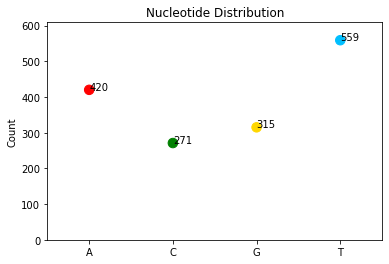

In [7]:
count_sequence("GAAATTACGAAGAAAATAAATAAAAATACAAAAAGCAGGTTCTTCTCTATATATTCGGAATTTAGCTTCCAAATAACGCAGAAGAAAGTAAAGAGAGAAGAAGCAAAAAGAGTCATATTCGTTGAAAACATCATTCACTCTTCTCTGCGTCTCCTTCTTTCACCCGAAATTGTCTCTGACACCGTTTTGATTCAGCCATGGTGATACTACATTTTCACTTCTTCTTGTTCTCTTTTTGTTTATTTCAGTTCTTCAATTTTTAGGCTCGATTCTCGATTTTTGCTTTCGTCTCGGATTTTGAATAACGATTTTGGCTCACTAGATCTGGTATATGGATTTGTTTTCTCCGATTTAGATCTTTGAGATTTTGTGTTGATGTGATCAGAGTTAGTGATCCACTTGTGCTTCGTAAGTTAGAATCGAAATCATGAAGGAATCTGCTAATTTTGTGTGTGTGCTTTCGAAGTTTCATTAACTATTGAACGTTTCTACGACCTTATTCGATTGTTTGATCCATCAGGCTTGTTGTGTGTTGAAGTTGCAATTGAAGTCTAAATCGTTGCTAGAGATGTATTAACGAGTTTATGTGTGAGCTATTCTAGTTTTAGAGGTTTCAGGAAATTTCTAAGATTCCTAAATAAGAGATTCTTGGCTTTTAGTATTGTGTGGATTCAATTATAGGCTAGCTTTGTGGGATCTGGGATGTGAATCTTAGTGCTTCTGTTGTTTTATTGAAATCAGGCTAATGCTGCGTCAGGAATGGCAGTCCATGATGACTGCAAGCTAAGATTTCTGGAACTGAAGGCGAAAAGGACACACCGTTTCATTGTCTACAAGATTGAGGAGAAGCAGAAGCAAGTGATTGTTGAGAAAGTTGGTGAACCTATTCTAACTTACGAGGACTTTGCAGCAAGTCTTCCAGCTGACGAATGCCGATACGCCATTTATGATTTCGACTTTGTCACTGCAGAGAATTGCCAGAAGAGCAAGATTTTCTTCATTGCATGGTAACATAATTTCTTGTTATCTGCTAAAACCATGTAACCTCATTTCTCTATTCTTACCTTGTTGTTGTTGTTGTTGCTGCTGCTGCCAAAGGTGTCCCGACGTAGCAAAGGTGAGAAGCAAGATGATCTATGCGAGCTCTAAGGACAGGTTCAAGCGTGAACTTGATGGAATTCAAGTGGAGCTTCAAGCAACTGATCCAACTGAGATGGATCTTGATGTTTTGAAAAGCCGCGTCAACTAAAAGAAACTCTCTTTGAATAAGCTTCCGATTATATTCGACTATTATGAAATGGTGTTTTCTATTCTCTTACAGTCTCTTGTGACTGTTAGATACACTTGACACCCTTCATTCTATCTGTCTGGTCTGTTCTCTGTGTCTATGTTACCTTACAGTGTCTCATCTATATTCAAAATTATCACAAGGTTTGTGCTGTGTTTGCTTCCTTTGTTTCAACTCTACCAAAGCTTAAGATTAAGATTTGGGTAAGATGATTCTTTTAAGCTTCCCTTTGTTCTCTTTGTTACAGAGGGTATAAAAAATGCAAAAACTATTCACC")

In [10]:
# Step3: gene structure
"""This is Part3: Get the information of gene structure from genome annotation files """
import pandas as pd

def structure_gene(locus):
    """Return the gene structure information of target gene."""
    #Finding gene locus and return the structure information
    url = 'https://gitlab.msu.edu/chenhua9/protein-prediction/-/raw/master/docs/files/Annotation_info.csv'
    df_file = pd.read_csv(url, error_bad_lines=False, sep='\t')
    res_s = df_file[df_file['Genename'].str.match(locus)]
    exon = len(res_s[res_s['Type'].str.match("exon")])
    print(locus,"has",exon,"exon")
    print(res_s)

In [12]:
structure_gene("AT5G59890")

AT5G59890 has 4 exon
        Type     Start       End   Genename
173890   CDS  24122545  24122547  AT5G59890
173891   CDS  24123089  24123354  AT5G59890
173892   CDS  24123107  24123354  AT5G59890
173895   CDS  24123446  24123596  AT5G59890
505051  exon  24122348  24122547  AT5G59890
505052  exon  24122525  24123354  AT5G59890
505054  exon  24123089  24123354  AT5G59890
505057  exon  24123446  24123912  AT5G59890
698161  mRNA  24122348  24123912  AT5G59890
698162  mRNA  24122525  24123912  AT5G59890
698163  mRNA  24122601  24123912  AT5G59890


In [13]:
# Step4: protein sequence
"""This is Part4: Get the information of protein sequence of the gene """
import matplotlib.pylab as plt
import numpy as np

def protein_sequence(seq):
    """Return the information of protein sequence of target gene."""
    #get the seq from part1 Download function
    #Providing the amino acid background information by using dictory
    aa_dic = {"A" : ["GCT","GCC","GCA","GCG"],
        "L" : ["TTA","TTG","CTT","CTC","CTA","CTG"],
        "R" : ["CGT","CGC","CGA","CGG","AGA","AGG"],
        "K" : ["AAA","AAG"],"N" : ["AAT","AAC"],
        "M" : ["ATG"],"D" : ["GAT","GAC"],
        "F" : ["TTT","TTC"],"C" : ["TGT","TGC"],
        "P" : ["CCT","CCC","CCA","CCG"],
        "Q" : ["CAA","CAG"],
        "S" : ["TCT","TCC","TCA","TCG","AGT","AGC"],
        "E" : ["GAA","GAG"],
        "T" : ["ACT","ACC","ACA","ACG"],
        "G" : ["GGT","GGC","GGA","GGG"],
        "W" : ["TGG"],"H" : ["CAT","CAC"],
        "Y" : ["TAT","TAC"],
        "I" : ["ATT","ATC","ATA"],
        "V" : ["GTT","GTC","GTA","GTG"]}
    name = ["A","L","R","K","N","M","D","F","C","P","Q","S","E","T","G","W","H","Y","I","V"]
    #getting the protein sequence
    res_p = []
    start = seq.index("ATG")+3
    for i in range(start,len(seq),3):
        sed = seq[i:i+3]
        for j in name:
            if sed in aa_dic[j]:
                posit = name.index(j)
        res_p.append([key for key in aa_dic.keys()][posit])
        proteinseq = ''.join(res_p)
#    return proteinseq
    #count the amino acid number
    count = []
    for i in name:
        count.append(proteinseq.count(i))
    ind = list(range(1, 21))
    n_num = count
    _, ax_x = plt.subplots()
    ax_x.scatter(ind, count)
    for i, txt in enumerate(n_num):
        ax_x.annotate(txt, (ind[i], count[i]))
    plt.xticks(ind,name)
    plt.ylabel('Count')
    plt.title('Amino Acid Distribution')
    plt.xlim()
    plt.ylim(-1,np.max(count)+5)
    plt.plot(ind, count,color="green")

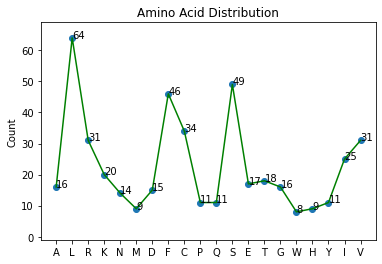

In [14]:
protein_sequence("GAAATTACGAAGAAAATAAATAAAAATACAAAAAGCAGGTTCTTCTCTATATATTCGGAATTTAGCTTCCAAATAACGCAGAAGAAAGTAAAGAGAGAAGAAGCAAAAAGAGTCATATTCGTTGAAAACATCATTCACTCTTCTCTGCGTCTCCTTCTTTCACCCGAAATTGTCTCTGACACCGTTTTGATTCAGCCATGGTGATACTACATTTTCACTTCTTCTTGTTCTCTTTTTGTTTATTTCAGTTCTTCAATTTTTAGGCTCGATTCTCGATTTTTGCTTTCGTCTCGGATTTTGAATAACGATTTTGGCTCACTAGATCTGGTATATGGATTTGTTTTCTCCGATTTAGATCTTTGAGATTTTGTGTTGATGTGATCAGAGTTAGTGATCCACTTGTGCTTCGTAAGTTAGAATCGAAATCATGAAGGAATCTGCTAATTTTGTGTGTGTGCTTTCGAAGTTTCATTAACTATTGAACGTTTCTACGACCTTATTCGATTGTTTGATCCATCAGGCTTGTTGTGTGTTGAAGTTGCAATTGAAGTCTAAATCGTTGCTAGAGATGTATTAACGAGTTTATGTGTGAGCTATTCTAGTTTTAGAGGTTTCAGGAAATTTCTAAGATTCCTAAATAAGAGATTCTTGGCTTTTAGTATTGTGTGGATTCAATTATAGGCTAGCTTTGTGGGATCTGGGATGTGAATCTTAGTGCTTCTGTTGTTTTATTGAAATCAGGCTAATGCTGCGTCAGGAATGGCAGTCCATGATGACTGCAAGCTAAGATTTCTGGAACTGAAGGCGAAAAGGACACACCGTTTCATTGTCTACAAGATTGAGGAGAAGCAGAAGCAAGTGATTGTTGAGAAAGTTGGTGAACCTATTCTAACTTACGAGGACTTTGCAGCAAGTCTTCCAGCTGACGAATGCCGATACGCCATTTATGATTTCGACTTTGTCACTGCAGAGAATTGCCAGAAGAGCAAGATTTTCTTCATTGCATGGTAACATAATTTCTTGTTATCTGCTAAAACCATGTAACCTCATTTCTCTATTCTTACCTTGTTGTTGTTGTTGTTGCTGCTGCTGCCAAAGGTGTCCCGACGTAGCAAAGGTGAGAAGCAAGATGATCTATGCGAGCTCTAAGGACAGGTTCAAGCGTGAACTTGATGGAATTCAAGTGGAGCTTCAAGCAACTGATCCAACTGAGATGGATCTTGATGTTTTGAAAAGCCGCGTCAACTAAAAGAAACTCTCTTTGAATAAGCTTCCGATTATATTCGACTATTATGAAATGGTGTTTTCTATTCTCTTACAGTCTCTTGTGACTGTTAGATACACTTGACACCCTTCATTCTATCTGTCTGGTCTGTTCTCTGTGTCTATGTTACCTTACAGTGTCTCATCTATATTCAAAATTATCACAAGGTTTGTGCTGTGTTTGCTTCCTTTGTTTCAACTCTACCAAAGCTTAAGATTAAGATTTGGGTAAGATGATTCTTTTAAGCTTCCCTTTGTTCTCTTTGTTACAGAGGGTATAAAAAATGCAAAAACTATTCACC")

In [15]:
# Step5: coding and non-coding areas
"""This is Part4: Get the information of dN/ds of non_coding and coding area."""

def cod_noncod(number, seq1, seq2):
    """Return the value of dn and ds in the target gene."""
    n_end = number
    m_start = 0
    non_x1 = seq1[m_start:n_end]
    non_x2 = seq2[m_start:n_end]
    non_sum_dn = 0
    non_sum_ds = 0
    non_total_dn = len(non_x1)/3*2
    non_total_ds = len(non_x1)/3
    for i in range(0,len(non_x1),3):
        a_seq = non_x1[i:i+3]
        b_seq = non_x2[i:i+3]
        non_dn = 0
        non_ds = 0
        if a_seq[0] != b_seq[0]:
            non_dn = non_dn + 1
        if a_seq[1] != b_seq[1]:
            non_dn = non_dn + 1
            non_sum_dn = non_sum_dn + non_dn
        if a_seq[2] != b_seq[2]:
            non_ds = non_ds + 1
            non_sum_ds = non_sum_ds + non_ds
    print("total Non-syn is:",non_sum_dn)
    print("total Syn is:",non_sum_ds)
    print("dn is:",round((non_sum_dn/non_total_dn),2))
    print("ds is:",round((non_sum_ds/non_total_ds),2))
    non_change = (non_sum_dn/non_total_dn)/(non_sum_ds/non_total_ds)
    print("dn/ds is:",non_change)
    non_tag = ("non-coding area is:")
    if non_change == 1:
        print(non_tag,"evolution neutrally")
    if non_change < 1:
        print(non_tag,"evoultion constrained")
    if non_change >1:
        print(non_tag,"evolution changing rapidly")
    print('\n')
    ##calculate the dn and ds in coding area
    cod_x1 = seq1[n_end:len(seq1)]
    cod_x2 = seq2[n_end:len(seq2)]
    cod_sum_dn = 0
    cod_sum_ds = 0
    cod_total_dn = len(cod_x1)/3*2
    cod_total_ds = len(cod_x1)/3
    for i in range(0,len(cod_x1),3):
        a_seqc = cod_x1[i:i+3]
        b_seqc = cod_x2[i:i+3]
        cod_dn = 0
        cod_ds = 0
        if a_seqc[0] != b_seqc[0]:
            cod_dn = cod_dn + 1
        if a_seqc[1] != b_seqc[1]:
            cod_dn = cod_dn + 1
            cod_sum_dn = cod_sum_dn + cod_dn
        if a_seqc[2] != b_seqc[2]:
            cod_ds = cod_ds + 1
            cod_sum_ds = cod_sum_ds + cod_ds
    print("total Non-syn is:",cod_sum_dn)
    print("total Syn is:",cod_sum_ds)
    print("dn is:",round((cod_sum_dn/cod_total_dn),2))
    print("ds is:",round((cod_sum_ds/cod_total_ds),2))
    cod_change = (cod_sum_dn/cod_total_dn)/(cod_sum_ds/cod_total_ds)
    print("dn/ds is:",cod_change)
    cod_tag = ("coding area is:")
    if cod_change == 1:
        print(cod_tag,"evolution neutrally")
    if cod_change < 1:
        print(cod_tag,"evoultion constrained")
    if cod_change >1:
        print(cod_tag,"evolution changing rapidly")
    return(non_change, cod_change)

In [16]:
cod_noncod(300,\
           "GAAATTACGAAGAAAATAAATAAAAATACAAAAAGCAGGTTCTTCTCTATATATTCGGAATTTAGCTTCCAAATAACGCAGAAGAAAGTAAAGAGAGAAGAAGCAAAAAGAGTCATATTCGTTGAAAACATCATTCACTCTTCTCTGCGTCTCCTTCTTTCACCCGAAATTGTCTCTGACACCGTTTTGATTCAGCCATGGTGATACTACATTTTCACTTCTTCTTGTTCTCTTTTTGTTTATTTCAGTTCTTCAATTTTTAGGCTCGATTCTCGATTTTTGCTTTCGTCTCGGATTTTGAATAACGATTTTGGCTCACTAGATCTGGTATATGGATTTGTTTTCTCCGATTTAGATCTTTGAGATTTTGTGTTGATGTGATCAGAGTTAGTGATCCACTTGTGCTTCGTAAGTTAGAATCGAAATCATGAAGGAATCTGCTAATTTTGTGTGTGTGCTTTCGAAGTTTCATTAACTATTGAACGTTTCTACGACCTTATTCGATTGTTTGATCCATCAGGCTTGTTGTGTGTTGAAGTTGCAATTGAAGTCTAAATCGTTGCTAGAGATGTATTAACGAGTTTATGTGTGAGCTATTCTAGTTTTAGAGGTTTCAGGAAATTTCTAAGATTCCTAAATAAGAGATTCTTGGCTTTTAGTATTGTGTGGATTCAATTATAGGCTAGCTTTGTGGGATCTGGGATGTGAATCTTAGTGCTTCTGTTGTTTTATTGAAATCAGGCTAATGCTGCGTCAGGAATGGCAGTCCATGATGACTGCAAGCTAAGATTTCTGGAACTGAAGGCGAAAAGGACACACCGTTTCATTGTCTACAAGATTGAGGAGAAGCAGAAGCAAGTGATTGTTGAGAAAGTTGGTGAACCTATTCTAACTTACGAGGACTTTGCAGCAAGTCTTCCAGCTGACGAATGCCGATACGCCATTTATGATTTCGACTTTGTCACTGCAGAGAATTGCCAGAAGAGCAAGATTTTCTTCATTGCATGGTAACATAATTTCTTGTTATCTGCTAAAACCATGTAACCTCATTTCTCTATTCTTACCTTGTTGTTGTTGTTGTTGCTGCTGCTGCCAAAGGTGTCCCGACGTAGCAAAGGTGAGAAGCAAGATGATCTATGCGAGCTCTAAGGACAGGTTCAAGCGTGAACTTGATGGAATTCAAGTGGAGCTTCAAGCAACTGATCCAACTGAGATGGATCTTGATGTTTTGAAAAGCCGCGTCAACTAAAA",\
           "AACACCACACACAGCAAAACAAAAAGCTCTCTACACTCAAAATATAACGAAAGAACAAGAAGACATCATCTTAGCTCACTATGGCTTTGAAGACGGTAACAATATACAAACTTTCTCTATTTTTTCCACTTTTGATTTAATGAATCTAAAAGAAAATATTTTGGATGATTGGTATATAGGCGACGAGTGGTATGTGGATGACGGATGATTGCAAGAAATCGTTCATGGAGATGAAATGGAAGAAAGTGCATAGATACGTCGTTTACAAACTCGAGGAGAAGTCTCGGAAAGTCACCGTCGACAAGGTTGGTGCCGCCGGCGAGAGCTACGACGATCTCGCTGCTTCTTTGCCGGAGGATGACTGTCGTTACGCCGTGTTTGATTTCGATTACGTCACCGTCGATAACTGTCGTATGAGCAAGATCTTCTTCATAACTTGGTTAGTGTCACTATCTCTTGTCTTTTCGATTTCTCGAATTGTCGATTTTACCCTTTTCCCACCATATAGTTCTATCGTCTCACTCGATGATCATCAAAGGATAAAATGGTCATTTGGATGTCCTAAGCCCAGGCTTTTTAACCCAAGGCCGGTTTGATCAAATATAACCGTACCGAATAAAACCAATCAAGATAATTGATTCTGTTTGGTTAAAAAATGGTTTACTTTATATCTTAAGTCGAAAAACTAGTAAAACCACTGAAACTTAATCAATCCATAATGTGGTTGTTATTGGAATAGGTCGCCGGAGGCTTCAAGGATAAGGGAGAAGATGATGTACGCGACGTCGAAGAGCGGACTGAGAAGAGTGTTGGATGGTGTTCACTACGAGCTTCAAGCCACCGACCCAACCGAGATGGGATTTGATAAAATCCAGGACCGGGCCAAATGATCACAACACATAACTGGAGTTATATCGTCAGTAACTAGCTGTTCTTAACAGTTATGACTTATGAGCAGCAATTAATTATCTATTAATGTTATTTAGTGCTTAACCTCTTCCCTTTGGTTGTCAAACAAAATGATTTACTTCTATTTTGTTGACAATAGTACTAAACTATTATTAGTGTTTCAGTTTAATTGTTGTTGTTTAGTTTTTTAAAAACTATGTTGAATGTTATTTTGTCTCTTTTTGTCACTAATGCTAATAAAAAGAAAAAAGTTTTAATATGTTTGACTTGAACTGAGGCATGAGGATAAAGTTTTGATTTTTGTAAGACAGTTCAAGCAAGGCATCAGTAAATTTAAGTATC")

total Non-syn is: 124
total Syn is: 77
dn is: 0.62
ds is: 0.77
dn/ds is: 0.8051948051948051
non-coding area is: evoultion constrained


total Non-syn is: 404
total Syn is: 242
dn is: 0.64
ds is: 0.76
dn/ds is: 0.8347107438016529
coding area is: evoultion constrained


(0.8051948051948051, 0.8347107438016529)

In [17]:
# Step6: tree genarate
"""This is Part6: Get the information of protein sequence of the gene """
import matplotlib.pylab as plt
import networkx as nx

def tree_builder(num_ber,input_info):
    """Return the information of evolution tree."""
    g_graph = nx.Graph()
    a_num = []
    for i in range(1,num_ber):
       a_num.append("ADF"+str(i))
    g_graph.add_nodes_from(a_num)
    g_graph.add_edges_from(input_info)
    nx.draw(g_graph,with_labels=True, font_weight='bold',pos=nx.spring_layout(g_graph))
    plt.show()
    print(nx.info(g_graph))
    return nx.info(g_graph).split("\n")[4].split(":")[1].replace('   ','')

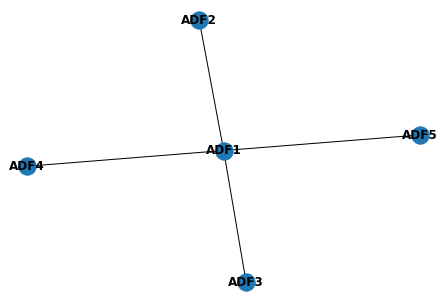

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


'1.6000'

In [18]:
tree_builder(5,[("ADF1","ADF2"),("ADF1","ADF3"),("ADF1","ADF4"),("ADF1","ADF5")])